In [2]:
%%capture
%run '01_Getting_Data.ipynb'

In [54]:
data_norm = data.bitcoin_price/data.bitcoin_price.max()*100
data_norm = pandas.DataFrame({'date':data_norm.index, 'normalized_bitcoin_price':data_norm.values})
data_norm.index = data_norm.date
del data_norm['date']
data = pandas.concat([bpi, google, data_norm], axis=1)
data.head()

,bitcoin_price,search_volume,normalized_bitcoin_price
date,,,
2011-05-01,3.0331,0.704634,0.038668
2011-05-02,3.2000,0.493244,0.040796
2011-05-03,3.4100,0.493244,0.043473
2011-05-04,3.4061,0.422781,0.043423
2011-05-05,3.3330,0.493244,0.042491


In [82]:
data_norm['positive'] = 0
data_norm['negative'] = 0
data_norm['is_positive'] = 0
data_norm['is_negative'] = 0

data_norm['positive'][data.search_volume > data.normalized_bitcoin_price] = data.search_volume - data.normalized_bitcoin_price
data_norm['negative'][data.search_volume < data.normalized_bitcoin_price] = data.normalized_bitcoin_price - data.search_volume

data_norm['is_positive'][data.search_volume > data.normalized_bitcoin_price] = 1
data_norm['is_negative'][data.search_volume < data.normalized_bitcoin_price] = 1

/Users/trang/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/trang/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/trang/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/trang/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithC

In [68]:
data_norm.positive.sum()

4709.438938559099

In [69]:
data_norm.negative.sum()

2576.0634407584744

In [72]:
abs(data.search_volume - data.normalized_bitcoin_price).sum()

7285.502379317574

In [75]:
2576.0634407584744/7285.502379317574

0.35358761916975334

In [76]:
4709.438938559099/7285.502379317574

0.6464123808302465

In [79]:
data_norm

,normalized_bitcoin_price,positive,negative,is_positive,is_negative
date,,,,,
2011-05-01,0.038668,0.665966,0.000000,1,0
2011-05-02,0.040796,0.452448,0.000000,1,0
2011-05-03,0.043473,0.449771,0.000000,1,0
2011-05-04,0.043423,0.379357,0.000000,1,0
2011-05-05,0.042491,0.450753,0.000000,1,0
2011-05-06,0.043983,0.378798,0.000000,1,0
2011-05-07,0.046418,0.446826,0.000000,1,0
2011-05-08,0.049285,0.514422,0.000000,1,0
2011-05-09,0.048445,0.656189,0.000000,1,0


In [83]:
data_norm.is_negative.sum()

545

In [84]:
data_norm.is_positive.sum()

1849

In [85]:
1849+545

2394

In [88]:
1849/2394

0.7723475355054302

In [89]:
545/2394

0.22765246449456975

In [90]:
len(data)

2394

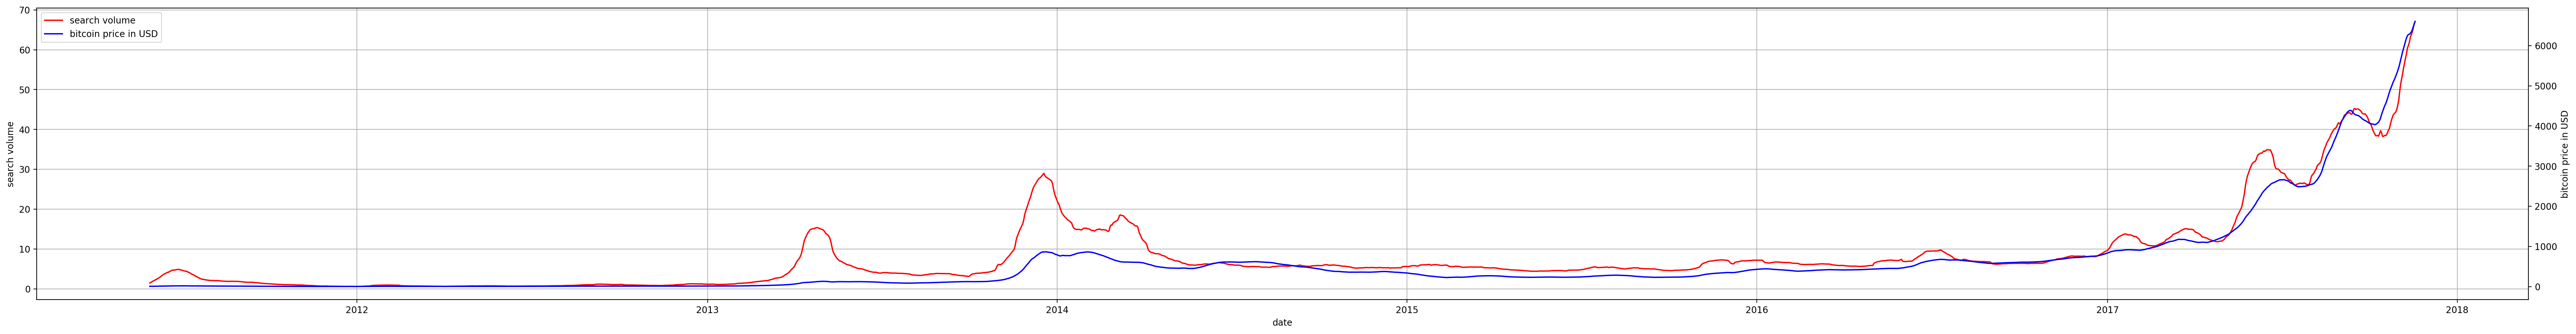

In [12]:
data_mean = data.rolling(window=30,center=False).mean()
#plot data
fig = matplotlib.pyplot.figure(num=None, figsize=(50, 6), dpi=200, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.grid()
lns1 = ax.plot(data_mean.index, data_mean.search_volume, label = search_volume_title, color ='r')
ax2 = ax.twinx()
lns2 = ax2.plot(data_mean.index, data_mean.bitcoin_price, label = bitcoin_title, color = 'b')

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=2)

ax.set_xlabel("date")

ax.set_ylabel(search_volume_title)
ax2.set_ylabel(bitcoin_title)